In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import os
from fastai import *
from fastai.vision import *

os.chdir("/home/auri/")
os.getcwd()

'/home/auri'

In [3]:
df = pd.read_csv('Rx-thorax-automatic-captioning/SJ_chest_x_ray_images_labels_160K.csv', header = 0, dtype=str)


In [4]:
df.loc[df.Labels.isna(),]

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
40181,42519,216840111366964013829543166512013354131013504_...,13.0,20131223,216840111366964013829543166512013354131013504,143149052504589452321757121308717850421,1967.0,F,POSTEROANTERIOR,PA,...,10,-0.61,4604465,NaN,RNN_model,NaN,NaN,NaN,NaN,NaN
41982,44421,216840111366964013686042548532013203142528282_...,14.0,20130726,216840111366964013686042548532013203142528282,18520261549509098753257363721422352651,1948.0,M,POSTEROANTERIOR,PA,...,10,-0.53,4515369,NaN,RNN_model,NaN,NaN,NaN,NaN,NaN
43016,45507,12752243479320242391263_02-082-065.png,14.0,20131015,12752243479320242391263,201527525456887484018437046841802388116,1944.0,F,POSTEROANTERIOR,PA,...,10,-0.51,4561683,NaN,RNN_model,NaN,NaN,NaN,NaN,NaN
43993,46548,216840111366964013686042548532013274120824884_...,15.0,20131001,216840111366964013686042548532013274120824884,22604306214366676424629926262108353831,1972.0,M,LATERAL,L,...,25,0.63,4554082,NaN,RNN_model,NaN,NaN,NaN,NaN,NaN
44014,46570,216840111366964013686042548532013274120824884_...,15.0,20131001,216840111366964013686042548532013274120824884,22604306214366676424629926262108353831,1972.0,M,POSTEROANTERIOR,PA,...,10,-0.74,4554082,NaN,RNN_model,NaN,NaN,NaN,NaN,NaN
47070,49741,216840111366964013663026955732013123120852254_...,16.0,20130508,216840111366964013663026955732013123120852254,164931277567539468475662881903336941782,1958.0,M,POSTEROANTERIOR,PA,...,8,-1.92,4464802,NaN,RNN_model,NaN,NaN,NaN,NaN,NaN
49075,51842,216840111366964013829543166512013318092424147_...,17.0,20131119,216840111366964013829543166512013318092424147,70329979563874610663417055276704256019,1969.0,M,POSTEROANTERIOR,PA,...,10,-0.84,4581353,NaN,RNN_model,NaN,NaN,NaN,NaN,NaN
50114,52935,216840111366964013590140476722013044083832376_...,17.0,20130213,216840111366964013590140476722013044083832376,302649461316524212941567484826663148249,1948.0,F,LATERAL,L,...,25,-0.63,4416911,NaN,RNN_model,NaN,NaN,NaN,NaN,NaN
50269,53101,216840111366964013590140476722013044083832376_...,17.0,20130213,216840111366964013590140476722013044083832376,302649461316524212941567484826663148249,1948.0,F,POSTEROANTERIOR,PA,...,10,-1.89,4416911,NaN,RNN_model,NaN,NaN,NaN,NaN,NaN
51063,53923,216840111366964013686042548532013205085737021_...,17.0,20130724,216840111366964013686042548532013205085737021,311664485277297275428114468300406021173,1972.0,F,POSTEROANTERIOR,PA,...,10,-2.37,4516435,NaN,RNN_model,NaN,NaN,NaN,NaN,NaN


In [4]:
df['Images'] = 'SJ/image_dir_processed/'+ df.ImageID

In [5]:
df.columns

Index(['Unnamed: 0', 'ImageID', 'ImageDir', 'StudyDate_DICOM', 'StudyID',
       'PatientID', 'PatientBirth', 'PatientSex_DICOM', 'ViewPosition_DICOM',
       'Projection', 'MethodProjection', 'Pediatric', 'Modality_DICOM',
       'Manufacturer_DICOM', 'PhotometricInterpretation_DICOM',
       'PixelRepresentation_DICOM', 'PixelAspectRatio_DICOM',
       'SpatialResolution_DICOM', 'BitsStored_DICOM', 'WindowCenter_DICOM',
       'WindowWidth_DICOM', 'Rows_DICOM', 'Columns_DICOM',
       'XRayTubeCurrent_DICOM', 'Exposure_DICOM', 'ExposureInuAs_DICOM',
       'ExposureTime', 'RelativeXRayExposure_DICOM', 'ReportID', 'Report',
       'MethodLabel', 'Labels', 'Localizations',
       'LabelsLocalizationsBySentence', 'labelCUIS', 'LocalizationsCUIS',
       'Images'],
      dtype='object')

In [6]:
import ast
def delabel(labels):
    r = None
    if labels is not None:
        try:
            r = pd.Series([label.strip() for label in  ast.literal_eval(labels)]).dropna().values
        except:
            r = None
    return r
    
df.loc[:,'labels'] = df.loc[:,'Labels'].apply(lambda l: delabel(l))

In [7]:
def delabel_loc(labels):
    r = None
    if labels is not None:
        try:
            r = pd.Series([label.replace('loc ','').strip() for sublist in  ast.literal_eval(labels) for label in sublist]).dropna().values
        except:
            r = None
    return r
    
#df.loc[:,'labelslocs'] = df.loc[:,'LabelsLocalizationsBySentence'].apply(lambda l: delabel_loc(l))

In [8]:
pd.options.display.max_colwidth = 500
df.loc[df.Labels == '[]', 'Report']

1834                                    masa pulmon paramediastin izquierd proxim vertic pulmon sin cambi con respect control previ .
1835                                    masa pulmon paramediastin izquierd proxim vertic pulmon sin cambi con respect control previ .
4081                                     ensanch mediastin parahili derech podri trat marc elongacion aortic masa mediastin cit tac .
7846                                                         herni hioatal paraesofag mixt produc efect masa mediastin inferomedial .
7847                                                         herni hioatal paraesofag mixt produc efect masa mediastin inferomedial .
10423                     ocupacion are paratraqueal derech con import desplaz traqueal haci izquierd efect masa boci tiroide conoc .
14526                                                                                           sin cambi con respect masa pulmon lsd
14715                                     masa mediastin anter

In [9]:
df.head()

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS,Images,labels
0,0,20536686640136348236148679891455886468_k6ga29.png,0.0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,POSTEROANTERIOR,PA,...,4765777,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[],SJ/image_dir_processed/20536686640136348236148679891455886468_k6ga29.png,[normal]
1,1,135803415504923515076821959678074435083_fzis7d.png,0.0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,LATERAL,L,...,4991845,cambi pulmonar cronic sever . sign fibrosis bibasal . sutil infiltr pseudonodul milimetr vidri deslustr localiz bas . cifosis sever .,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyphosis', 'pseudonodule', 'ground glass pattern']","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral'], ['chronic changes'], ['kyphosis'], ['pseudonodule', 'ground glass pattern', 'loc basal']]",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378'],SJ/image_dir_processed/135803415504923515076821959678074435083_fzis7d.png,"[pulmonary fibrosis, chronic changes, kyphosis, pseudonodule, ground glass pattern]"
2,2,135803415504923515076821959678074435083_fzis7b.png,0.0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,POSTEROANTERIOR,PA,...,4991845,cambi pulmonar cronic sever . sign fibrosis bibasal . sutil infiltr pseudonodul milimetr vidri deslustr localiz bas . cifosis sever .,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyphosis', 'pseudonodule', 'ground glass pattern']","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral'], ['chronic changes'], ['kyphosis'], ['pseudonodule', 'ground glass pattern', 'loc basal']]",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378'],SJ/image_dir_processed/135803415504923515076821959678074435083_fzis7b.png,"[pulmonary fibrosis, chronic changes, kyphosis, pseudonodule, ground glass pattern]"
3,3,113855343774216031107737439268243531979_3k951l.png,0.0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,POSTEROANTERIOR,PA,...,4955977,. . siluet cardi mediastin dentr normal . cambi pulmonar cronic . . . sen costofren libr . . . no sign enfermed metastas .,Physician,['chronic changes'],"['loc costophrenic angle', 'loc cardiac', 'loc mediastinum']","[['chronic changes'], ['chronic changes'], ['normal', 'loc mediastinum', 'loc cardiac'], ['normal', 'loc mediastinum', 'loc cardiac'], ['normal'], ['normal'], ['normal', 'loc costophrenic angle']]",['C0742362'],['C0230151' 'C1522601' 'C0025066'],SJ/image_dir_processed/113855343774216031107737439268243531979_3k951l.png,[chronic changes]
4,4,113855343774216031107737439268243531979_3k951n.png,0.0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,LATERAL,L,...,4955977,. . siluet cardi mediastin dentr normal . cambi pulmonar cronic . . . sen costofren libr . . . no sign enfermed metastas .,Physician,['chronic changes'],"['loc costophrenic angle', 'loc cardiac', 'loc mediastinum']","[['chronic changes'], ['chronic changes'], ['normal', 'loc mediastinum', 'loc cardiac'], ['normal', 'loc mediastinum', 'loc cardiac'], ['normal'], ['normal'], ['normal', 'loc costophrenic angle']]",['C0742362'],['C0230151' 'C1522601' 'C0025066'],SJ/image_dir_processed/113855343774216031107737439268243531979_3k951n.png,[chronic changes]


In [10]:
df_fastai = df[['ImageID','labels']][df.Labels != '[]']
df_fastai.head()


,ImageID,labels
0,20536686640136348236148679891455886468_k6ga29.png,[normal]
1,135803415504923515076821959678074435083_fzis7d.png,"[pulmonary fibrosis, chronic changes, kyphosis, pseudonodule, ground glass pattern]"
2,135803415504923515076821959678074435083_fzis7b.png,"[pulmonary fibrosis, chronic changes, kyphosis, pseudonodule, ground glass pattern]"
3,113855343774216031107737439268243531979_3k951l.png,[chronic changes]
4,113855343774216031107737439268243531979_3k951n.png,[chronic changes]


In [11]:
print(df_fastai.shape)
df_fastai = df_fastai[df_fastai['labels'].isna() == False]
df_fastai = df_fastai.reset_index(drop = True)
print(df_fastai.shape)
df_fastai.head()

(160845, 2)
(160742, 2)


,ImageID,labels
0,20536686640136348236148679891455886468_k6ga29.png,[normal]
1,135803415504923515076821959678074435083_fzis7d.png,"[pulmonary fibrosis, chronic changes, kyphosis, pseudonodule, ground glass pattern]"
2,135803415504923515076821959678074435083_fzis7b.png,"[pulmonary fibrosis, chronic changes, kyphosis, pseudonodule, ground glass pattern]"
3,113855343774216031107737439268243531979_3k951l.png,[chronic changes]
4,113855343774216031107737439268243531979_3k951n.png,[chronic changes]


In [12]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df_fastai, random_state=42, test_size=0.2, shuffle=True)

In [13]:
#remove instances from validation set that contains labels not in training
train_label_set = set([l for sublist in train.labels for l in sublist ])
val.loc[:,'label_set'] =  val.labels.apply(set)
val_r = val.loc[val.label_set <= train_label_set,]
print(val_r.shape)
print(val.shape)
val_idxs=val_r.index.values


(32147, 3)
(32149, 3)


/home/auri/anaconda3/envs/fastai-Ene19/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/auri/anaconda3/envs/fastai-Ene19/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
import cv2
def open_png16(self, fn):
    img = cv2.imread(str(fn), cv2.IMREAD_UNCHANGED).astype(np.float32)/65535
    #img = cv2.resize(img, (224,224))
    return Image(torch.tensor(img).unsqueeze(0).expand((3,-1,-1)))
#open_png16(fn ="SJ/image_dir_processed/113855343774216031107737439268243531979_3k951l.png")

In [15]:
p = "/home/auri/SJ/"
bach_size = 16

In [16]:
#ImageItemList.open = open_png16 # MONKEY PATCH!
#data = ImageDataBunch.from_df(df = df_fastai, #create_func = open_png16,
                              #path = p, valid_pct=0.0, folder = 'image_dir_processed',
                              #size=(224,224), bs=bach_size, ds_tfms=get_transforms())

In [26]:
import cv2
class MyImageItemList(ImageItemList):
    def open(self,fn):
        #print(fn)
        img = cv2.imread(str(fn), cv2.IMREAD_UNCHANGED).astype(np.float32)/65535
        #img = cv2.resize(img, (224,224))
        return Image(torch.tensor(img).unsqueeze(0).expand((3,-1,-1)))

In [27]:
data = (MyImageItemList.from_df(
    df = df_fastai, path = p, 
    folder='image_dir_downsized4x').split_by_idx(valid_idx=val_idxs).label_from_df(
    cols='labels').transform(
    get_transforms(do_flip = False, max_rotate = 5.0, max_zoom = 1.1, max_warp = None), 
    size=(224,224)).databunch(bs=bach_size).normalize(imagenet_stats))                          


/home/auri/SJ/image_dir_processed/195317710063939164685256083251458230903_qrvajo.png
/home/auri/SJ/image_dir_processed/216840111366964013336287914842012096173328028_01-111-015.png
/home/auri/SJ/image_dir_processed/216840111366964012283393834152009012121956287_00-011-087.png
/home/auri/SJ/image_dir_processed/216840111366964013418328332882012206123516433_01-063-018.png
/home/auri/SJ/image_dir_processed/216840111366964012819207061112010309085706096_04-015-081.png
/home/auri/SJ/image_dir_processed/67399191888269680631339125267097261842_qmvpv2.png
/home/auri/SJ/image_dir_processed/216840111366964013663026955732013128130304440_02-036-082.png
/home/auri/SJ/image_dir_processed/216840111366964012819207061112010320112100426_04-012-189.png
/home/auri/SJ/image_dir_processed/216840111366964012989926673512011083083836237_00-158-141.png
/home/auri/SJ/image_dir_processed/216840111366964012989926673512011108134848167_00-186-092.png
/home/auri/SJ/image_dir_processed/2168401113669640134183283328820121981

/home/auri/SJ/image_dir_processed/216840111366964013439197051132012219143015701_01-154-015.png
/home/auri/SJ/image_dir_processed/49631641213430158704808989070344669761_j84hb7.png
/home/auri/SJ/image_dir_processed/216840111366964013076187734852011265123040704_00-131-071.png
/home/auri/SJ/image_dir_processed/216840111366964012283393834152009023102044223_00-013-143.png
/home/auri/SJ/image_dir_processed/216840111366964013076187734852011297134021276_01-028-118.png
/home/auri/SJ/image_dir_processed/216840111366964013307756408102012082122256414_01-089-032.png
/home/auri/SJ/image_dir_processed/216840111366964013590140476722013048001140948_02-064-004.png
/home/auri/SJ/image_dir_processed/216840111366964012373310883942009167095510278_00-092-064.png
/home/auri/SJ/image_dir_processed/216840111366964013451228379692012269113044578_01-053-152.png
/home/auri/SJ/image_dir_processed/216840111366964013375835044302012143103115397_01-142-073.png
/home/auri/SJ/image_dir_processed/216840111366964013217898866

/home/auri/SJ/image_dir_processed/216840111366964012989926673512011159120152455_01-013-154.png
/home/auri/SJ/image_dir_processed/287477937883562528432853422696629480268_gj0fqm.png
/home/auri/SJ/image_dir_processed/1275224347932024825820_00-066-089.png
/home/auri/SJ/image_dir_processed/216840111366964013307756408102012082180159756_01-110-177.png
/home/auri/SJ/image_dir_processed/313184436250893430116286420676498211959_ckmk40.png
/home/auri/SJ/image_dir_processed/216840111366964013534861372972012332121136315_01-156-051.png
/home/auri/SJ/image_dir_processed/216840111366964012819207061112010267105533881_03-184-165.png
/home/auri/SJ/image_dir_processed/216840111366964012558082906712009307080000273_00-107-050.png
/home/auri/SJ/image_dir_processed/216840111366964012373310883942009127135435875_00-042-034.png
/home/auri/SJ/image_dir_processed/216840111366964013274515230432012030080052652_01-042-038.png
/home/auri/SJ/image_dir_processed/216840111366964012989926673512011088080400814_00-163-148.pn

/home/auri/SJ/image_dir_processed/216840111366964013200840352202011322121403449_01-026-110.png
/home/auri/SJ/image_dir_processed/275060678346613219794271841777951503645_15ghgs.png
/home/auri/SJ/image_dir_processed/216840111366964013663026955732013109083628892_02-074-149.png
/home/auri/SJ/image_dir_processed/216840111366964012558082906712009307083508808_00-107-046.png
/home/auri/SJ/image_dir_processed/216840111366964012558082906712010018084806766_02-127-097.png
/home/auri/SJ/image_dir_processed/210696739510938258586861473265785958838_jtj9qr.png
/home/auri/SJ/image_dir_processed/1284011361921821080861721922914126003202085_01-189-126.png
/home/auri/SJ/image_dir_processed/259847422493747056028143791522541561657_9vofbi.png
/home/auri/SJ/image_dir_processed/216840111366964012819207061112010256135941184_03-132-179.png
/home/auri/SJ/image_dir_processed/216840111366964013829543166512013332112710251_02-089-104.png
/home/auri/SJ/image_dir_processed/89155092823122425712371039818644709376_xv69g0.pn

/home/auri/SJ/image_dir_processed/216840111366964013686042548532013289130030295_02-088-190.png
/home/auri/SJ/image_dir_processed/216840111366964013686042548532013185153055441_02-031-083.png
/home/auri/SJ/image_dir_processed/216840111366964013402131755672012181100709169_01-065-178.png
/home/auri/SJ/image_dir_processed/216840111366964013307756408102012093141751430_01-111-065.png
/home/auri/SJ/image_dir_processed/216840111366964012768025509942010195143507203_03-136-173.png
/home/auri/SJ/image_dir_processed/139800616849387851945955722671798801084_uzjkne.png
/home/auri/SJ/image_dir_processed/216840111366964012989926673512011150123308357_00-149-142.png
/home/auri/SJ/image_dir_processed/216840111366964013515091760022012307131915149_01-153-190.png
/home/auri/SJ/image_dir_processed/216840111366964012959786098432011034123407680_00-165-093.png
/home/auri/SJ/image_dir_processed/265857485859725118374570139978369238580_618zno.png
/home/auri/SJ/image_dir_processed/216840111366964012373310883942009202

/home/auri/SJ/image_dir_processed/216840111366964013686042548532013168112124041_02-099-144.png
/home/auri/SJ/image_dir_processed/216840111366964012373310883942009117084022290_00-063-162.png
/home/auri/SJ/image_dir_processed/216840111366964012558082906712010018141959378_03-123-164.png
/home/auri/SJ/image_dir_processed/216840111366964012373310883942009138092727786_00-037-198.png
/home/auri/SJ/image_dir_processed/1284011361921821080861721922914126005012510_01-199-055.png
/home/auri/SJ/image_dir_processed/216840111366964013643839805242013092085632228_02-075-169.png
/home/auri/SJ/image_dir_processed/216840111366964013686042548532013280111007258_02-081-028.png
/home/auri/SJ/image_dir_processed/275447724382793001186213317445915855541_arti4v.png
/home/auri/SJ/image_dir_processed/82686654195380002714131567420038699878_e9a3n6.png
/home/auri/SJ/image_dir_processed/216840111366964013686042548532013267112459535_02-020-053.png
/home/auri/SJ/image_dir_processed/216840111366964013451228379692012275170

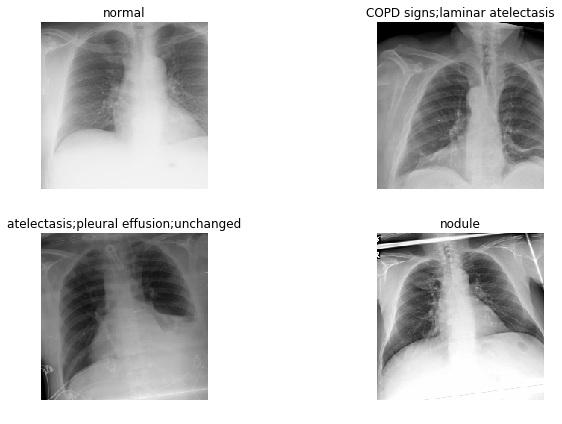

In [19]:
data.show_batch(rows=2, figsize=(10,6))


In [28]:
data.classes

['',
 'COPD signs',
 'Chilaiditi sign',
 'NSG tube',
 'abnormal foreign body',
 'abscess',
 'adenopathy',
 'air bronchogram',
 'air fluid level',
 'air trapping',
 'alveolar pattern',
 'aortic aneurysm',
 'aortic atheromatosis',
 'aortic button enlargement',
 'aortic elongation',
 'aortic endoprosthesis',
 'apical pleural thickening',
 'artificial aortic heart valve',
 'artificial heart valve',
 'artificial mitral heart valve',
 'asbestosis signs',
 'ascendent aortic elongation',
 'atelectasis',
 'atelectasis basal',
 'atypical pneumonia',
 'axial hyperostosis',
 'azygoesophageal recess shift',
 'azygos lobe',
 'blastic bone lesion',
 'bone cement',
 'bone metastasis',
 'breast mass',
 'bronchiectasis',
 'bronchovascular markings',
 'bullas',
 'calcified adenopathy',
 'calcified densities',
 'calcified fibroadenoma',
 'calcified granuloma',
 'calcified mediastinal adenopathy',
 'calcified pleural plaques',
 'calcified pleural thickening',
 'callus rib fracture',
 'cardiomegaly',
 'cath

interstitial pattern;infiltrates;pneumonia;pleural effusion
ImageID        216840111366964012339356563862009040100057519_00-055-082.png
labels     [interstitial pattern, infiltrates, pneumonia, pleural effusion]
Name: 139625, dtype: object


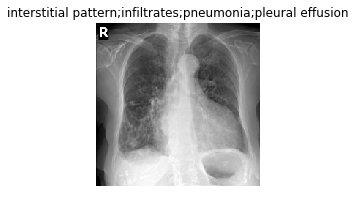

In [29]:
img,labels = data.valid_ds[-1]
print(labels)
print(df_fastai.loc[val_idxs[-1],])
img.show(title=labels)


In [ ]:
learn = create_cnn(data, models.resnet34, metrics=Fbeta(beta=2))
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate


In [ ]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate


AttributeError: Traceback (most recent call last):
  File "/home/auri/anaconda3/envs/fastai-Ene19/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/auri/anaconda3/envs/fastai-Ene19/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/auri/anaconda3/envs/fastai-Ene19/lib/python3.7/site-packages/fastai/data_block.py", line 544, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/home/auri/anaconda3/envs/fastai-Ene19/lib/python3.7/site-packages/fastai/data_block.py", line 94, in __getitem__
    if isinstance(idxs, numbers.Integral): return self.get(idxs)
  File "/home/auri/anaconda3/envs/fastai-Ene19/lib/python3.7/site-packages/fastai/vision/data.py", line 266, in get
    res = self.open(fn)
  File "<ipython-input-26-9d19cd1f0ecd>", line 5, in open
    img = cv2.imread(str(fn), cv2.IMREAD_UNCHANGED).astype(np.float32)/65535
AttributeError: 'NoneType' object has no attribute 'astype'


In [ ]:
learn.save('stage-1')


In [ ]:
learn.load('stage-1')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [13]:
all_studies_st_DF = pd.read_csv('Rx-thorax-automatic-captioning/all_info_studies_sent_topics.csv', header = 0, sep = ',', dtype=str)


In [14]:
all_studies_st_DF.columns

Index(['Unnamed: 0', 'ImagePath', 'StudyID', 'PatientID', 'PatientBirth',
       'PatientSex', 'ReportID', 'Report', 'StudyDate', 'Modality',
       'SeriesDescription', 'ProtocolName', 'CodeMeaning', 'Manufacturer',
       'ViewPosition', 'BodyPartExamined', 'Rows', 'Columns',
       'PixelAspectRatio', 'SpatialResolution', 'PhotometricInterpretation',
       'BitsStored', 'PixelRepresentation', 'WindowCenter', 'WindowWidth',
       'RelativeXRayExposure', 'ExposureTime', 'XRayTubeCurrent',
       'ExposureInuAs', 'Exposure', 'key', 'class', 'text'],
      dtype='object')

In [15]:
all_studies_st_DF_filter = all_studies_st_DF.loc[all_studies_st_DF.text.str.contains('mas ') == True,]


In [16]:
pd.options.display.max_colwidth = 500
all_studies_st_DF_filter.text.head()

263    visualiz camp medi hemitorax derech mas pulmon aproxim 5 5 x 6 4 cm redond bien defin aument taman respect rx torax previ fech 25 09 2013 con comp descart primer posibil diagnost etiologi tumoral
269    visualiz camp medi hemitorax derech mas pulmon aproxim 5 5 x 6 4 cm redond bien defin aument taman respect rx torax previ fech 25 09 2013 con comp descart primer posibil diagnost etiologi tumoral
456                                                                                                                                                         imag mas mediastin inferior probabl herni hiat
458                                                                                                                                                         imag mas mediastin inferior probabl herni hiat
755                                     apreci aument densid retrocardiac basal izquierd relacion con infiltr mas derram pleural hallazg sugest proces infecci inflamatori control tras fina

In [11]:
all_studies_st_DF_filter.shape

(688, 33)

In [35]:
column_names = ['text','topic', 'counts']
column_names.extend(list('123456789'))
sent_labels = pd.read_csv('Rx-thorax-automatic-captioning/manual_review/labeled_sent_28K.csv', header = 0, sep = ',', dtype=str)


In [29]:
sent_labels_filter = sent_labels.loc[sent_labels.text.str.contains('masa ') == True,]


In [30]:
sent_labels_filter.shape

(158, 13)

In [31]:
sent_labels_filter.text.head()

1387                                                marc ensanch mediastin superior probabl masa mediastin
1388                                 masa mediastin orig vascul conoc relacion con aneurism sacul cay aort
1389                                                                              masa paratraqueal derech
1554    masa cavit lsi plante diagnost diferencial neoplasi pulmon cavern tubercul absces asoci perd volum
2324                                              condensacion masa segment anterior lobul inferior derech
Name: text, dtype: object

In [32]:
sent_labels_filter['text_no_masa'] = sent_labels_filter.text.str.replace('masa ', 'mas ')

/home/auri/anaconda3/envs/fastai-Ene19/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
sent_labels_filter['text_no_masa'].head()

1387                                                marc ensanch mediastin superior probabl mas mediastin
1388                                 mas mediastin orig vascul conoc relacion con aneurism sacul cay aort
1389                                                                              mas paratraqueal derech
1554    mas cavit lsi plante diagnost diferencial neoplasi pulmon cavern tubercul absces asoci perd volum
2324                                              condensacion mas segment anterior lobul inferior derech
Name: text_no_masa, dtype: object

In [34]:
sent_labels_filter.head()

,Unnamed: 0,text,topic,counts,1,2,3,4,5,6,7,8,9,text_no_masa
1387,1387,marc ensanch mediastin superior probabl masa mediastin,0.0,1.0,superior mediastinal enlargement,mediastinal mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,marc ensanch mediastin superior probabl mas mediastin
1388,1388,masa mediastin orig vascul conoc relacion con aneurism sacul cay aort,0.0,2.0,aortic aneurysm,mediastinal mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mas mediastin orig vascul conoc relacion con aneurism sacul cay aort
1389,1389,masa paratraqueal derech,0.0,4.0,pulmonary mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mas paratraqueal derech
1554,1554,masa cavit lsi plante diagnost diferencial neoplasi pulmon cavern tubercul absces asoci perd volum,2.0,2.0,tuberculosis,pulmonary mass,cavitation,abscess,NaN,NaN,NaN,NaN,NaN,mas cavit lsi plante diagnost diferencial neoplasi pulmon cavern tubercul absces asoci perd volum
2324,2324,condensacion masa segment anterior lobul inferior derech,1.0,2.0,consolidation,pulmonary mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,condensacion mas segment anterior lobul inferior derech


In [36]:
sent_labels.loc[:,'text_no_masa'] = sent_labels.text
sent_labels.loc[sent_labels.text.str.contains('masa ') == True, 'text_no_masa'] = sent_labels.text.str.replace('masa ', 'mas ')

In [43]:
sent_labels.loc[sent_labels.text.str.contains('masa ') == True, ['text','text_no_masa']]


,text,text_no_masa
1387,marc ensanch mediastin superior probabl masa mediastin,marc ensanch mediastin superior probabl mas mediastin
1388,masa mediastin orig vascul conoc relacion con aneurism sacul cay aort,mas mediastin orig vascul conoc relacion con aneurism sacul cay aort
1389,masa paratraqueal derech,mas paratraqueal derech
1554,masa cavit lsi plante diagnost diferencial neoplasi pulmon cavern tubercul absces asoci perd volum,mas cavit lsi plante diagnost diferencial neoplasi pulmon cavern tubercul absces asoci perd volum
2324,condensacion masa segment anterior lobul inferior derech,condensacion mas segment anterior lobul inferior derech
2540,gran masa afect lsi lingul,gran mas afect lsi lingul
3065,masa infrahili posterobasal derech conoc biopsi,mas infrahili posterobasal derech conoc biopsi
3066,masa lii conoc,mas lii conoc
3068,masa mediastin hili izquierd asoci component obstruccion atelectasi neumonitis lsi,mas mediastin hili izquierd asoci component obstruccion atelectasi neumonitis lsi
3069,masa pulmon lsd,mas pulmon lsd


In [47]:
sent_labels.loc[sent_labels.text_no_masa.str.contains('masa ') == True, 'text_no_masa']


Series([], Name: text_no_masa, dtype: object)

In [44]:
sent_labels.shape

(22714, 14)

In [49]:
sent_labels.text = sent_labels.text_no_masa
sent_labels.drop(['text_no_masa'], inplace = True, axis = 1)
print(sent_labels.text[22187])
sent_labels.to_csv('Rx-thorax-automatic-captioning/manual_review/labeled_sent_28K_no_masa.csv', index = False)


opac axil derech relacion mas axil conoc


In [50]:
_all_studies = pd.read_csv('Rx-thorax-automatic-captioning/_all_info_studies_labels_160K.csv', header = 0, sep = ',', dtype=str)
all_studies = pd.read_csv('Rx-thorax-automatic-captioning/all_info_studies_labels_160K.csv', header = 0, sep = ',', dtype=str)


In [56]:
ne = (all_studies.index.values != _all_studies.index.values) == True

In [58]:
ne = pd.Series(ne)


In [59]:
ne.describe()

count     168171
unique         1
top        False
freq      168171
dtype: object

In [60]:
_all_studies.columns


Index(['Unnamed: 0', 'BitsStored', 'BodyPartExamined', 'CodeMeaning',
       'Columns', 'DICOMImagePath', 'Exposure', 'ExposureInuAs',
       'ExposureTime', 'ImagePath', 'Manufacturer', 'MethodLabel', 'Modality',
       'PatientBirth', 'PatientID', 'PatientSex', 'PhotometricInterpretation',
       'PixelAspectRatio', 'PixelRepresentation', 'ProtocolName',
       'RelativeXRayExposure', 'Report', 'ReportID', 'Rows',
       'SeriesDescription', 'SpatialResolution', 'StudyDate', 'StudyID',
       'Unnamed: 0.1', 'ViewPosition', 'WindowCenter', 'WindowWidth',
       'XRayTubeCurrent', 'labels', 'localizations', 'study_label_and_local'],
      dtype='object')

In [61]:
all_studies.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'BitsStored', 'BodyPartExamined',
       'CodeMeaning', 'Columns', 'DICOMImagePath', 'Exposure', 'ExposureInuAs',
       'ExposureTime', 'ImagePath', 'Manufacturer', 'MethodLabel', 'Modality',
       'PatientBirth', 'PatientID', 'PatientSex', 'PhotometricInterpretation',
       'PixelAspectRatio', 'PixelRepresentation', 'ProtocolName',
       'RelativeXRayExposure', 'Report', 'ReportID', 'Rows',
       'SeriesDescription', 'SpatialResolution', 'StudyDate', 'StudyID',
       'Unnamed: 0.1.1', 'ViewPosition', 'WindowCenter', 'WindowWidth',
       'XRayTubeCurrent', 'labels', 'localizations', 'study_label_and_local',
       'Review', 'Pediatric'],
      dtype='object')

In [112]:
df = pd.read_csv('Rx-thorax-automatic-captioning/SJ_chest_x_ray_images_labels_160K.csv', header = 0, dtype=str)
df2 = pd.read_csv('Rx-thorax-automatic-captioning/SJ_chest_x_ray_images_labels_160K_Ene19.csv', header = 0, dtype=str)


In [79]:
ne = (df != df2).any(1)


In [82]:
ne_stacked = (df != df2).stack()
changed = ne_stacked[ne_stacked]
changed.index.names = ['id', 'col']
changed

id      col                          
0       Pediatric                        True
1       Pediatric                        True
2       Pediatric                        True
3       Pediatric                        True
        Localizations                    True
        LabelsLocalizationsBySentence    True
        LocalizationsCUIS                True
4       Pediatric                        True
        Localizations                    True
        LabelsLocalizationsBySentence    True
        LocalizationsCUIS                True
5       ViewPosition_DICOM               True
        Pediatric                        True
6       ViewPosition_DICOM               True
        Pediatric                        True
        Localizations                    True
        LocalizationsCUIS                True
7       ViewPosition_DICOM               True
        Pediatric                        True
        Localizations                    True
        LocalizationsCUIS                T

In [113]:
df2.loc[df.ImageID == '216840111366964013686042548532013214135937247_02-002-109.png',].loc[45071,]

Unnamed: 0                                                                                                                 47667
ImageID                                                             216840111366964013686042548532013214135937247_02-002-109.png
ImageDir                                                                                                                    15.0
StudyDate_DICOM                                                                                                         20130802
StudyID                                                                            216840111366964013686042548532013214135937247
PatientID                                                                                 21194708879527664433843235475495105893
PatientBirth                                                                                                              1940.0
PatientSex_DICOM                                                                                 

In [103]:
df2.loc[(df.ImageID == '30661727075761817007267292459310975718_86nsuj.png'),].loc[105,]

Unnamed: 0                                                                                                                                                                                                                                                                                                                                                                                                                               107
ImageID                                                                                                                                                                                                                                                                                                                                                                                    30661727075761817007267292459310975718_86nsuj.png
ImageDir                                                                                                                                      

In [97]:
df2[df2.Pediatric.isna() == False]

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
216,221,62099871704902880343187697364243424587_5pzx3y.png,0.0,20151216,62099871704902880343187697364243424587,265226117459810257716713056305789256033,1968.0,F,POSTEROANTERIOR,PA,...,16,None,5051483,sin hallazg relev .,Physician,['normal'],[],[['normal']],[],[]
217,222,62099871704902880343187697364243424587_5pzx40.png,0.0,20151216,62099871704902880343187697364243424587,265226117459810257716713056305789256033,1968.0,F,LATERAL,L,...,40,None,5051483,sin hallazg relev .,Physician,['normal'],[],[['normal']],[],[]
481,502,113063276708233006064758396808973407543_mg56yd.png,0.0,20141119,113063276708233006064758396808973407543,199777452726727301275783132373800457229,2009.0,M,NaN,PA,...,None,79,4810198,. . . . apreci infiltr mal defin lingul borr parcial bord cardiac izquierd sugest proces inflamatori infecci correlacion con clinic .,Physician,"['infiltrates', 'pneumonia']","['loc lingula', 'loc cardiac', 'loc left']","[['infiltrates', 'pneumonia', 'loc lingula', 'loc cardiac', 'loc left']]",['C0277877' 'C0032285'],['C0225740' 'C1522601' 'C0443246']
482,503,113063276708233006064758396808973407543_7h6aqt.png,0.0,20141119,113063276708233006064758396808973407543,199777452726727301275783132373800457229,2009.0,M,NaN,L,...,None,71,4810198,. . . . apreci infiltr mal defin lingul borr parcial bord cardiac izquierd sugest proces inflamatori infecci correlacion con clinic .,Physician,"['infiltrates', 'pneumonia']","['loc lingula', 'loc cardiac', 'loc left']","[['infiltrates', 'pneumonia', 'loc lingula', 'loc cardiac', 'loc left']]",['C0277877' 'C0032285'],['C0225740' 'C1522601' 'C0443246']
483,504,113063276708233006064758396808973407543_80frzd.png,0.0,20141119,113063276708233006064758396808973407543,199777452726727301275783132373800457229,2009.0,M,NaN,L,...,None,60,4810198,. . . . apreci infiltr mal defin lingul borr parcial bord cardiac izquierd sugest proces inflamatori infecci correlacion con clinic .,Physician,"['infiltrates', 'pneumonia']","['loc lingula', 'loc cardiac', 'loc left']","[['infiltrates', 'pneumonia', 'loc lingula', 'loc cardiac', 'loc left']]",['C0277877' 'C0032285'],['C0225740' 'C1522601' 'C0443246']
1202,1245,315138197185376342602672468788400424951_7ncbz9.png,0.0,20160422,315138197185376342602672468788400424951,27559123992898196960888331860915665440,2011.0,M,PA,PA,...,9,171,5132352,infiltr alveol retrocardiac si clinic compat proces neumon infecci .,Physician,"['alveolar pattern', 'pneumonia']",['loc retrocardiac'],"[['alveolar pattern', 'pneumonia', 'loc retrocardiac']]",['C1332240' 'C0032285'],[]
1271,1316,212712654813808452125363936435151386976_9th2vh.png,0.0,20150310,212712654813808452125363936435151386976,272276596455890218885628720973945224271,2010.0,M,NaN,PA,...,0,440,4878069,infiltr hili infrahili derech relacion con proces infecci inflamatori,Physician,"['infiltrates', 'pneumonia']","['loc hilar', 'loc infrahilar', 'loc right']","[['infiltrates', 'pneumonia', 'loc hilar', 'loc infrahilar', 'loc right']]",['C0277877' 'C0032285'],['C0205150' 'C0444532']
1406,1452,141402930860355362066024496090716499628_01gyj1.png,0.0,20140730,141402930860355362066024496090716499628,249308580342486592423680762976979044024,2014.0,F,NaN,AP,...,None,928,4741853,sign neumotorax anterior . sond nasogastr infradiafragmat . catet umbilical acces venos con extrem altur d 11 .,Physician,"['NSG tube', 'central venous catheter via umbilical vein', 'pneumothorax']",['loc infradiaphragm'],"[['NSG tube', 'loc infradiaphragm'], ['central venous catheter via umbilical vein'], ['pneumothorax']]",['C0398284' 'C2073565'],[]
1407,1453,141402930860355362066024496090716499628_twvvzo.png,0.0,20140730,141402930860355362066024496090716499628,249308580342486592423680762976979044024,2014.0,F,NaN

In [110]:
df.loc[df.Pediatric != 'PED', 'Pediatric'] = 'No'

In [111]:
df.Pediatric.describe()

count     160861
unique         2
top           No
freq      160587
Name: Pediatric, dtype: object

In [117]:
df2[df2.Pediatric == 'PED']

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
216,221,62099871704902880343187697364243424587_5pzx3y.png,0.0,20151216,62099871704902880343187697364243424587,265226117459810257716713056305789256033,1968.0,F,POSTEROANTERIOR,PA,...,16,None,5051483,sin hallazg relev .,Physician,['normal'],[],[['normal']],[],[]
217,222,62099871704902880343187697364243424587_5pzx40.png,0.0,20151216,62099871704902880343187697364243424587,265226117459810257716713056305789256033,1968.0,F,LATERAL,L,...,40,None,5051483,sin hallazg relev .,Physician,['normal'],[],[['normal']],[],[]
481,502,113063276708233006064758396808973407543_mg56yd.png,0.0,20141119,113063276708233006064758396808973407543,199777452726727301275783132373800457229,2009.0,M,NaN,PA,...,None,79,4810198,. . . . apreci infiltr mal defin lingul borr parcial bord cardiac izquierd sugest proces inflamatori infecci correlacion con clinic .,Physician,"['infiltrates', 'pneumonia']","['loc lingula', 'loc cardiac', 'loc left']","[['infiltrates', 'pneumonia', 'loc lingula', 'loc cardiac', 'loc left']]",['C0277877' 'C0032285'],['C0225740' 'C1522601' 'C0443246']
482,503,113063276708233006064758396808973407543_7h6aqt.png,0.0,20141119,113063276708233006064758396808973407543,199777452726727301275783132373800457229,2009.0,M,NaN,L,...,None,71,4810198,. . . . apreci infiltr mal defin lingul borr parcial bord cardiac izquierd sugest proces inflamatori infecci correlacion con clinic .,Physician,"['infiltrates', 'pneumonia']","['loc lingula', 'loc cardiac', 'loc left']","[['infiltrates', 'pneumonia', 'loc lingula', 'loc cardiac', 'loc left']]",['C0277877' 'C0032285'],['C0225740' 'C1522601' 'C0443246']
483,504,113063276708233006064758396808973407543_80frzd.png,0.0,20141119,113063276708233006064758396808973407543,199777452726727301275783132373800457229,2009.0,M,NaN,L,...,None,60,4810198,. . . . apreci infiltr mal defin lingul borr parcial bord cardiac izquierd sugest proces inflamatori infecci correlacion con clinic .,Physician,"['infiltrates', 'pneumonia']","['loc lingula', 'loc cardiac', 'loc left']","[['infiltrates', 'pneumonia', 'loc lingula', 'loc cardiac', 'loc left']]",['C0277877' 'C0032285'],['C0225740' 'C1522601' 'C0443246']
1202,1245,315138197185376342602672468788400424951_7ncbz9.png,0.0,20160422,315138197185376342602672468788400424951,27559123992898196960888331860915665440,2011.0,M,PA,PA,...,9,171,5132352,infiltr alveol retrocardiac si clinic compat proces neumon infecci .,Physician,"['alveolar pattern', 'pneumonia']",['loc retrocardiac'],"[['alveolar pattern', 'pneumonia', 'loc retrocardiac']]",['C1332240' 'C0032285'],[]
1271,1316,212712654813808452125363936435151386976_9th2vh.png,0.0,20150310,212712654813808452125363936435151386976,272276596455890218885628720973945224271,2010.0,M,NaN,PA,...,0,440,4878069,infiltr hili infrahili derech relacion con proces infecci inflamatori,Physician,"['infiltrates', 'pneumonia']","['loc hilar', 'loc infrahilar', 'loc right']","[['infiltrates', 'pneumonia', 'loc hilar', 'loc infrahilar', 'loc right']]",['C0277877' 'C0032285'],['C0205150' 'C0444532']
1406,1452,141402930860355362066024496090716499628_01gyj1.png,0.0,20140730,141402930860355362066024496090716499628,249308580342486592423680762976979044024,2014.0,F,NaN,AP,...,None,928,4741853,sign neumotorax anterior . sond nasogastr infradiafragmat . catet umbilical acces venos con extrem altur d 11 .,Physician,"['NSG tube', 'central venous catheter via umbilical vein', 'pneumothorax']",['loc infradiaphragm'],"[['NSG tube', 'loc infradiaphragm'], ['central venous catheter via umbilical vein'], ['pneumothorax']]",['C0398284' 'C2073565'],[]
1407,1453,141402930860355362066024496090716499628_twvvzo.png,0.0,20140730,141402930860355362066024496090716499628,249308580342486592423680762976979044024,2014.0,F,NaN